In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sf 
pi = np.pi

RF Power (dBm): 9.5 , Peak RF voltage (V):  0.9440608762859236
--------------------------------------------------
% Power at 1.0GHz: 19.72% | 	 at 2.0GHz: 0.0%
--------------------------------------------------


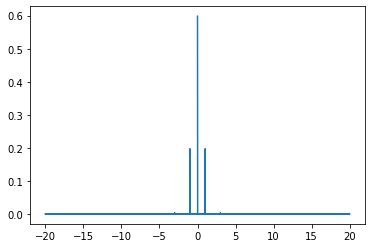

Voltage drop with rf on:  0.9999999999999998


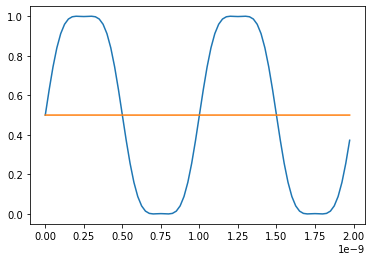

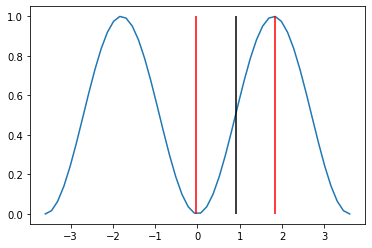

In [20]:
def dbmToVolt(Pdbm):
    P = 10**(Pdbm/10-3)
    return np.sqrt(2 * P * 50)

def Transmission(V, Vpi):
    return np.sin(V/Vpi * pi) ** 2

def lowpass(nus, spec, nuCO):
    return spec*1/( (np.abs(nus)/nuCO)**2 + 1)

Vpi = 3.6
dnu = 1e7
nu_max = 20e9
dt = 1/(2*nu_max)
T = 1/dnu
t = np.arange(0, T, dt)

setpoint = -10.5
Omega_rf = 1e9
gain = 34
losses = 14
Vp = dbmToVolt(setpoint + gain - losses)
print("RF Power (dBm):", setpoint + gain - losses, ", Peak RF voltage (V): ", Vp)
print(50*"-")
V_rf = Vp * np.sin(2*pi*Omega_rf*t)
V_B0 = Vpi/4
V_B = V_B0 + V_rf
T = Transmission(V_B, Vpi)
nus, spec = np.fft.fftfreq(len(t), dt), np.fft.fft(T)
power_spec = np.abs(spec)**2
power_spec_norm = power_spec/np.sum(power_spec)
P_1 = power_spec_norm[np.argwhere(nus == Omega_rf).flatten()[0]]
P_2 = power_spec_norm[np.argwhere(nus == 2*Omega_rf).flatten()[0]]
print(f"% Power at {Omega_rf*1e-9}GHz: {np.round_(P_1*100,2)}% | \t at {2*Omega_rf*1e-9}GHz: {np.round_(P_2*100,2)}%")
print(50*"-")
plt.plot(nus*1e-9, power_spec_norm)
plt.show()

f_BW_Diode = 12e6
mask = np.argwhere(t < 2*1/Omega_rf).flatten()
plt.plot(t[mask], T[mask])
spec_filtered = lowpass(nus, spec, f_BW_Diode)
T_filtered = np.real(np.fft.ifft(spec_filtered)[mask])
print("Voltage drop with rf on: ", np.mean(T_filtered)/Transmission(V_B0, Vpi))
plt.plot(t[mask], T_filtered[mask])
plt.show()

plt.plot(np.linspace(-Vpi, Vpi), Transmission(np.linspace(-Vpi, Vpi), Vpi))
plt.vlines(np.amin(V_B), 0, 1, color='r')
plt.vlines(np.amax(V_B), 0, 1, color='r')
plt.vlines(V_B0, 0, 1, color='k')
plt.show()